# Explore here

In [13]:
import pandas as pd
# URL del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
# Cargar los datos
df = pd.read_csv(url)

# Ver los primeros registros
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### EDA

In [14]:
# Info general
print(df.info())

# Descripción estadística
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [15]:
print(df.isnull().sum())  # Muestra cuántos valores nulos hay por columna

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


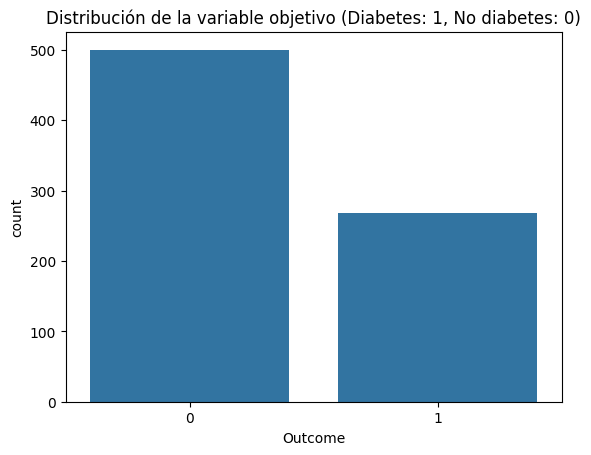

In [16]:
# Revisar la distribución de la variable objetivo

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Outcome"])
plt.title("Distribución de la variable objetivo (Diabetes: 1, No diabetes: 0)")
plt.show()

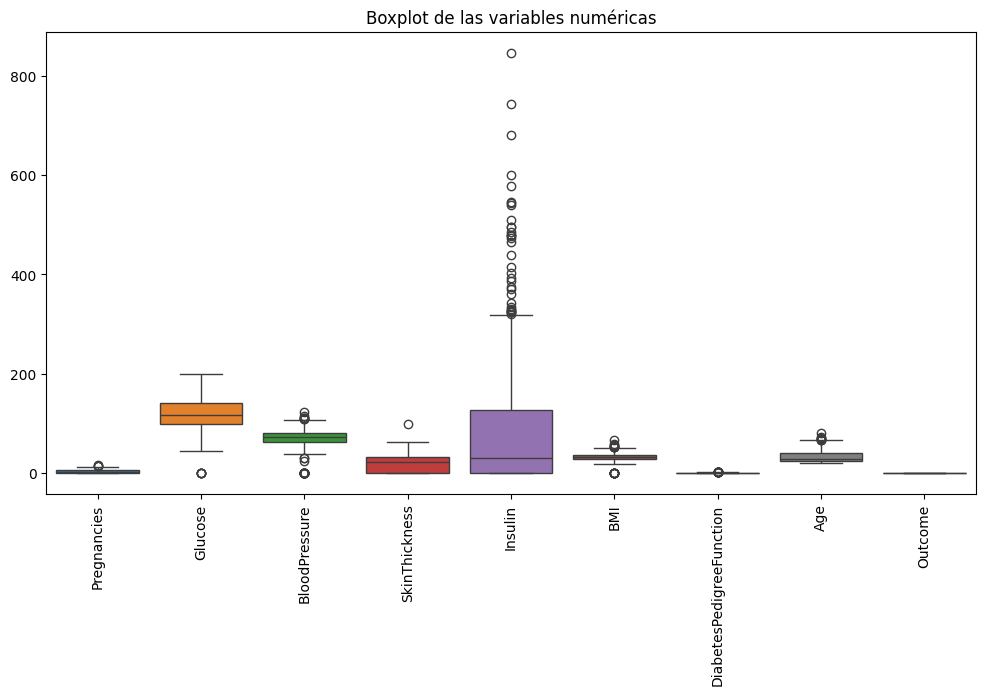

In [17]:
# Reviso outliers

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot de las variables numéricas")
plt.show()

### Empiezo a armar el modelo

In [18]:
X = df.drop(columns=["Outcome"])  # Variables predictoras
y = df["Outcome"]  # Variable objetivo

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Entreno el modelo

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo
xgb = XGBClassifier(random_state=42)

# Entrenar
xgb.fit(X_train, y_train)

# Predecir
y_pred = xgb.predict(X_test)

# Evaluar
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80 20]
 [21 33]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



#### Graficos de analisis de rendimiento del modelo

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
)
import joblib  # para guardar el modelo

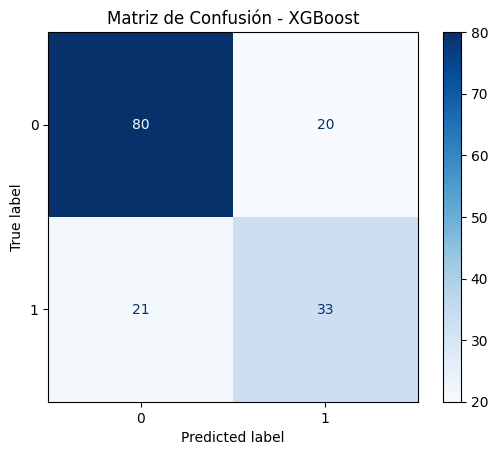

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - XGBoost")
plt.savefig("confusion_matrix_xgboost.png")
plt.show()

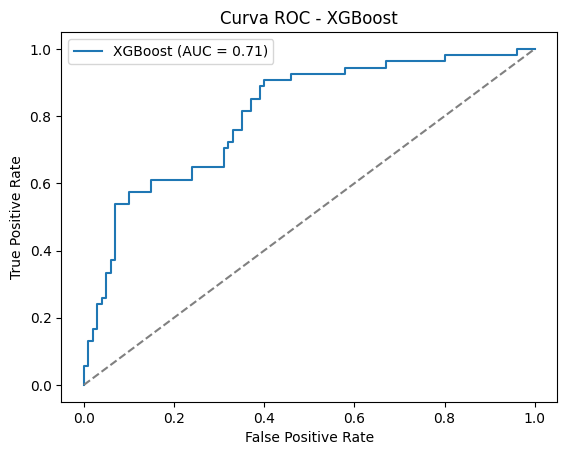

In [23]:
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_pred):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.savefig("roc_curve_xgboost.png")
plt.show()

In [25]:
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



#### Guardo los datos, modelo

In [26]:
joblib.dump(xgb, "xgboost_model.pkl")

['xgboost_model.pkl']